# INTRODUCTION

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import random
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from scipy import stats
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, make_scorer

In [183]:
#Load Datset
df= pd.read_csv('loan_approval_dataset.csv')

In [184]:
# Print Dataset
df

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

# DATA STRUCTURE

In [186]:
#Delete the space in the columns string
df.columns = df.columns.str.strip()

In [187]:
#Showing the first ten values
df.head(10)

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   
5        6                 0       Graduate           Yes       4800000   
6        7                 5       Graduate            No       8700000   
7        8                 2       Graduate           Yes       5700000   
8        9                 0       Graduate           Yes        800000   
9       10                 5   Not Graduate            No       1100000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   
5     13500000         10          319                   6800000   
6     33000000          4          678                  22500000   
7     15000000         20          382                  13200000   
8      2200000         20          782                   1300000   
9      4300000         10          388                   3200000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000    Approved  
1                  2200000              8800000           3300000    Rejected  
2                  4500000             33300000          12800000    Rejected  
3                  3300000             23300000           7900000    Rejected  
4                  8200000             29400000           5000000    Rejected  
5                  8300000             13700000           5100000    Rejected  
6                 14800000             29200000           4300000    Approved  
7                  5700000             11800000           6000000    Rejected  
8                   800000              2800000            600000    Approved  
9                  1400000              3300000           1600000    Rejected

In [188]:
##Shape of the dataset
df.shape

(4269, 13)

In [189]:
##Size of the data
df.size

55497

In [190]:
##Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# PREPARATION OF DATA

In [192]:
#Checking for duplicates
df.duplicated().sum()

0

In [193]:
##Checking for missing values
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [194]:
##Describing the dataset
df.describe()

loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  
count         4.269000e+03      4.269000e+03  
mean          1.512631e+07      4.976692e+06  
std           9.103754e+06      3.250185e+06  
min           3.000000e+05      0.000000e+00  
25%           7.500000e+06      2.300000e+06  
50%           1.460000e+07      4.600000e+06  
75%           2.170000e+07      7.100000e+06  
max           3.920000e+07      1.470000e+07

In [195]:
#Transposed dataset
df.describe().T

count          mean           std       min  \
loan_id                   4269.0  2.135000e+03  1.232498e+03       1.0   
no_of_dependents          4269.0  2.498712e+00  1.695910e+00       0.0   
income_annum              4269.0  5.059124e+06  2.806840e+06  200000.0   
loan_amount               4269.0  1.513345e+07  9.043363e+06  300000.0   
loan_term                 4269.0  1.090045e+01  5.709187e+00       2.0   
cibil_score               4269.0  5.999361e+02  1.724304e+02     300.0   
residential_assets_value  4269.0  7.472617e+06  6.503637e+06 -100000.0   
commercial_assets_value   4269.0  4.973155e+06  4.388966e+06       0.0   
luxury_assets_value       4269.0  1.512631e+07  9.103754e+06  300000.0   
bank_asset_value          4269.0  4.976692e+06  3.250185e+06       0.0   

                                25%         50%         75%         max  
loan_id                      1068.0      2135.0      3202.0      4269.0  
no_of_dependents                1.0         3.0         4.0         5.0  
income_annum              2700000.0   5100000.0   7500000.0   9900000.0  
loan_amount               7700000.0  14500000.0  21500000.0  39500000.0  
loan_term                       6.0        10.0        16.0        20.0  
cibil_score                   453.0       600.0       748.0       900.0  
residential_assets_value  2200000.0   5600000.0  11300000.0  29100000.0  
commercial_assets_value   1300000.0   3700000.0   7600000.0  19400000.0  
luxury_assets_value       7500000.0  14600000.0  21700000.0  39200000.0  
bank_asset_value          2300000.0   4600000.0   7100000.0  14700000.0

In [196]:
##Checking data types
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

# EXPLORATORY DATA ANALYSIS

In [198]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [199]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols)

Numerical Columns: Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


In [200]:
outlier_counts = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

In [201]:
# Print outlier counts before removal
print("Outlier counts before removal:")
for col, count in outlier_counts.items():
    print(f"Column: {col}, Outliers: {count}")

Outlier counts before removal:
Column: loan_id, Outliers: 0
Column: no_of_dependents, Outliers: 0
Column: income_annum, Outliers: 0
Column: loan_amount, Outliers: 0
Column: loan_term, Outliers: 0
Column: cibil_score, Outliers: 0
Column: residential_assets_value, Outliers: 52
Column: commercial_assets_value, Outliers: 37
Column: luxury_assets_value, Outliers: 0
Column: bank_asset_value, Outliers: 5


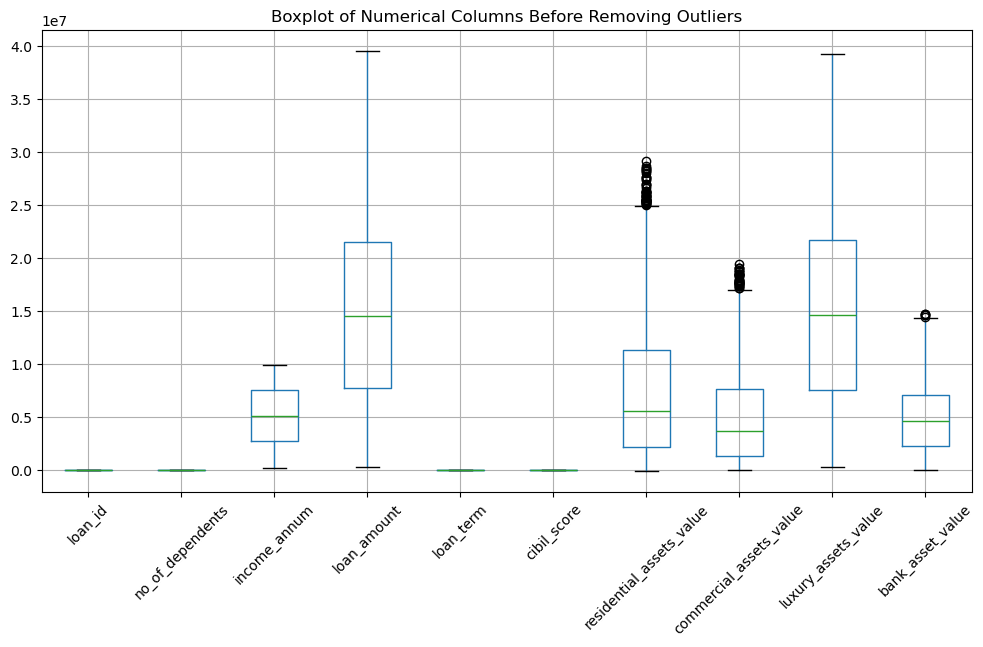

In [202]:
# Visualize outliers using boxplots before removal
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Columns Before Removing Outliers")
plt.show()

In [203]:
# Remove outliers using stricter Z-score (threshold = 2)
z_scores = np.abs(stats.zscore(df[numerical_cols]))
df_cleaned = df[(z_scores < 2).all(axis=1)]

# Apply IQR method to remove remaining outliers
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

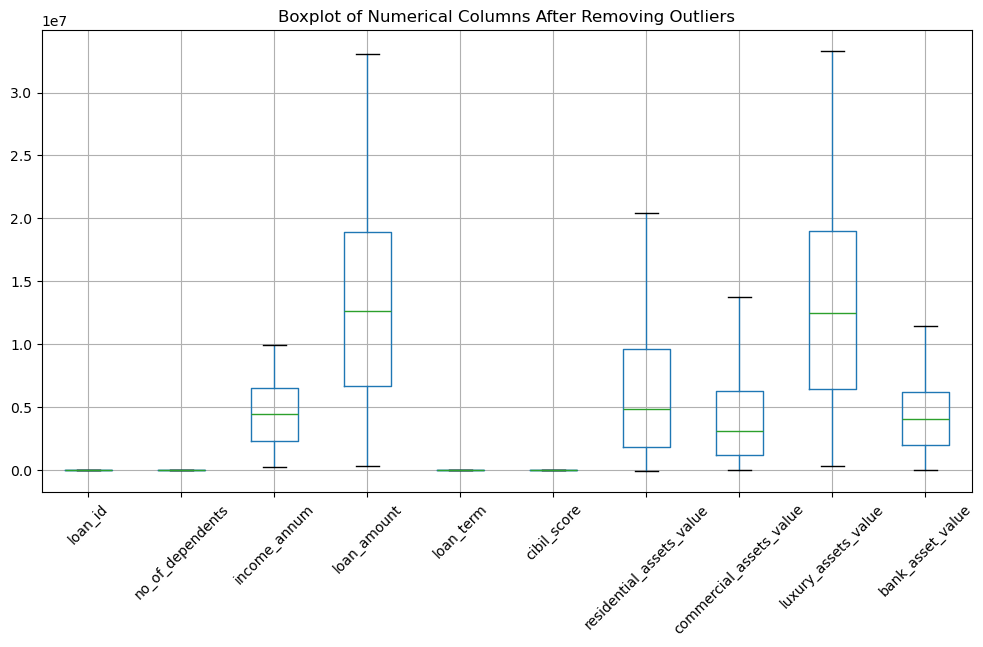

In [204]:
# Visualize outliers using boxplots after removal
plt.figure(figsize=(12, 6))
df_cleaned[numerical_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Columns After Removing Outliers")
plt.show()

In [205]:
# Print outlier counts after removal
outlier_counts_after = {}
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outlier_counts_after[col] = len(outliers)

print("Outlier counts after removal:")
for col, count in outlier_counts_after.items():
    print(f"Column: {col}, Outliers: {count}")

Outlier counts after removal:
Column: loan_id, Outliers: 0
Column: no_of_dependents, Outliers: 0
Column: income_annum, Outliers: 0
Column: loan_amount, Outliers: 0
Column: loan_term, Outliers: 0
Column: cibil_score, Outliers: 0
Column: residential_assets_value, Outliers: 0
Column: commercial_assets_value, Outliers: 0
Column: luxury_assets_value, Outliers: 0
Column: bank_asset_value, Outliers: 0


In [206]:
print("Sum of Unique Values in Numerical Columns After Removing Outliers:")
for col in numerical_cols:
    print(f"Column: {col}, Unique Values: {df_cleaned[col].nunique()}")

Sum of Unique Values in Numerical Columns After Removing Outliers:
Column: loan_id, Unique Values: 3664
Column: no_of_dependents, Unique Values: 6
Column: income_annum, Unique Values: 98
Column: loan_amount, Unique Values: 323
Column: loan_term, Unique Values: 10
Column: cibil_score, Unique Values: 601
Column: residential_assets_value, Unique Values: 206
Column: commercial_assets_value, Unique Values: 138
Column: luxury_assets_value, Unique Values: 329
Column: bank_asset_value, Unique Values: 115


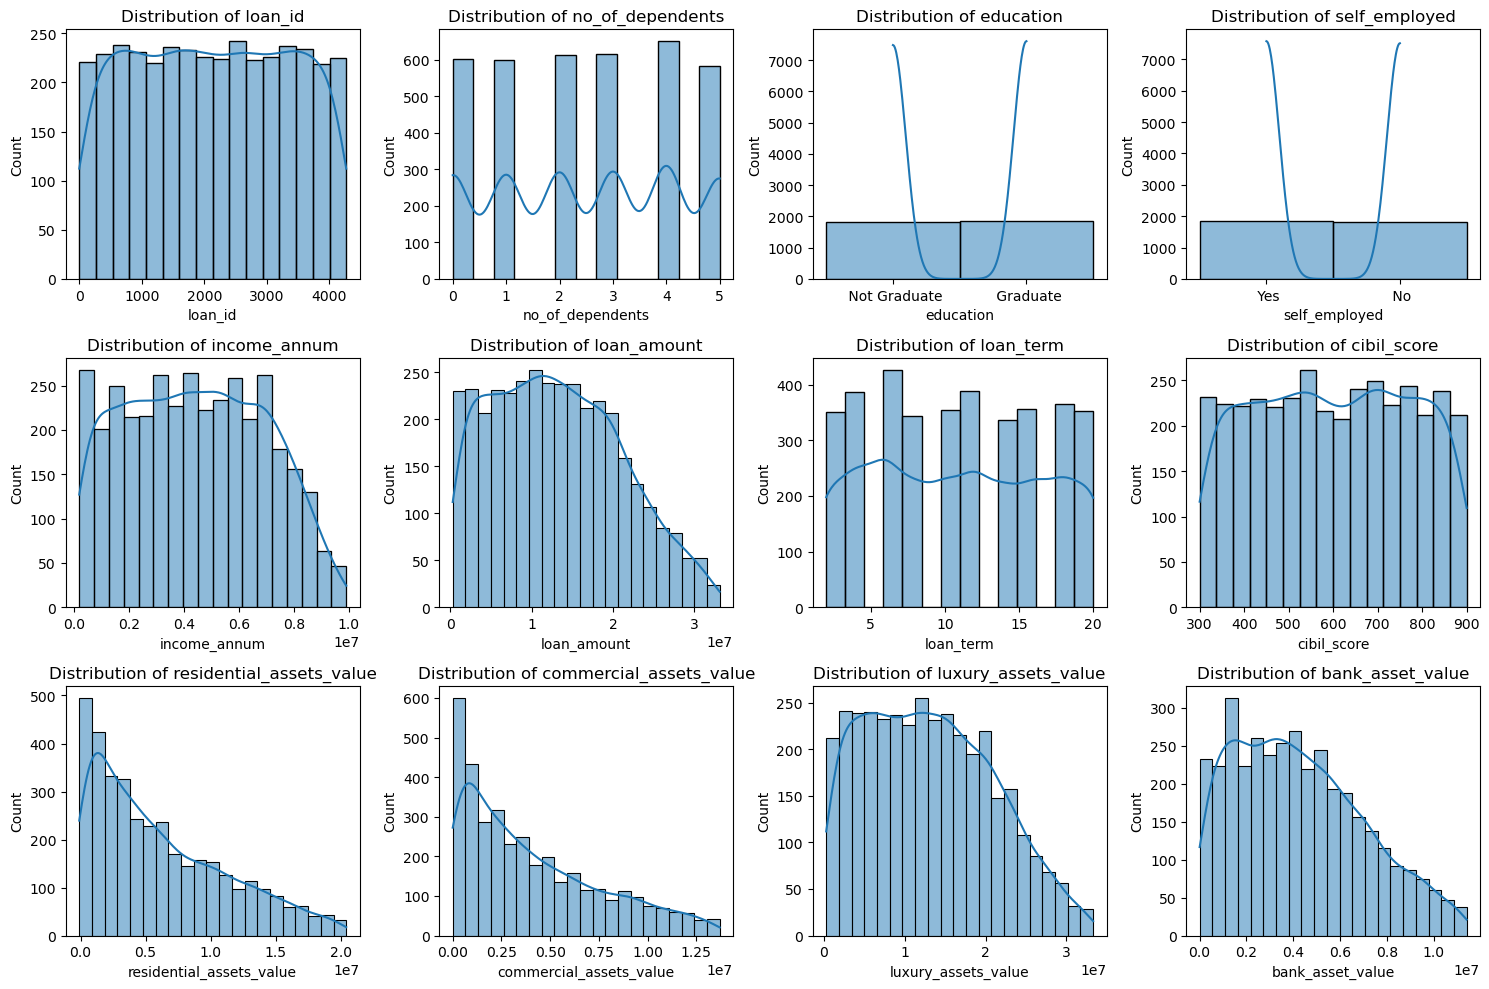

In [207]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_cleaned.columns[:12], 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

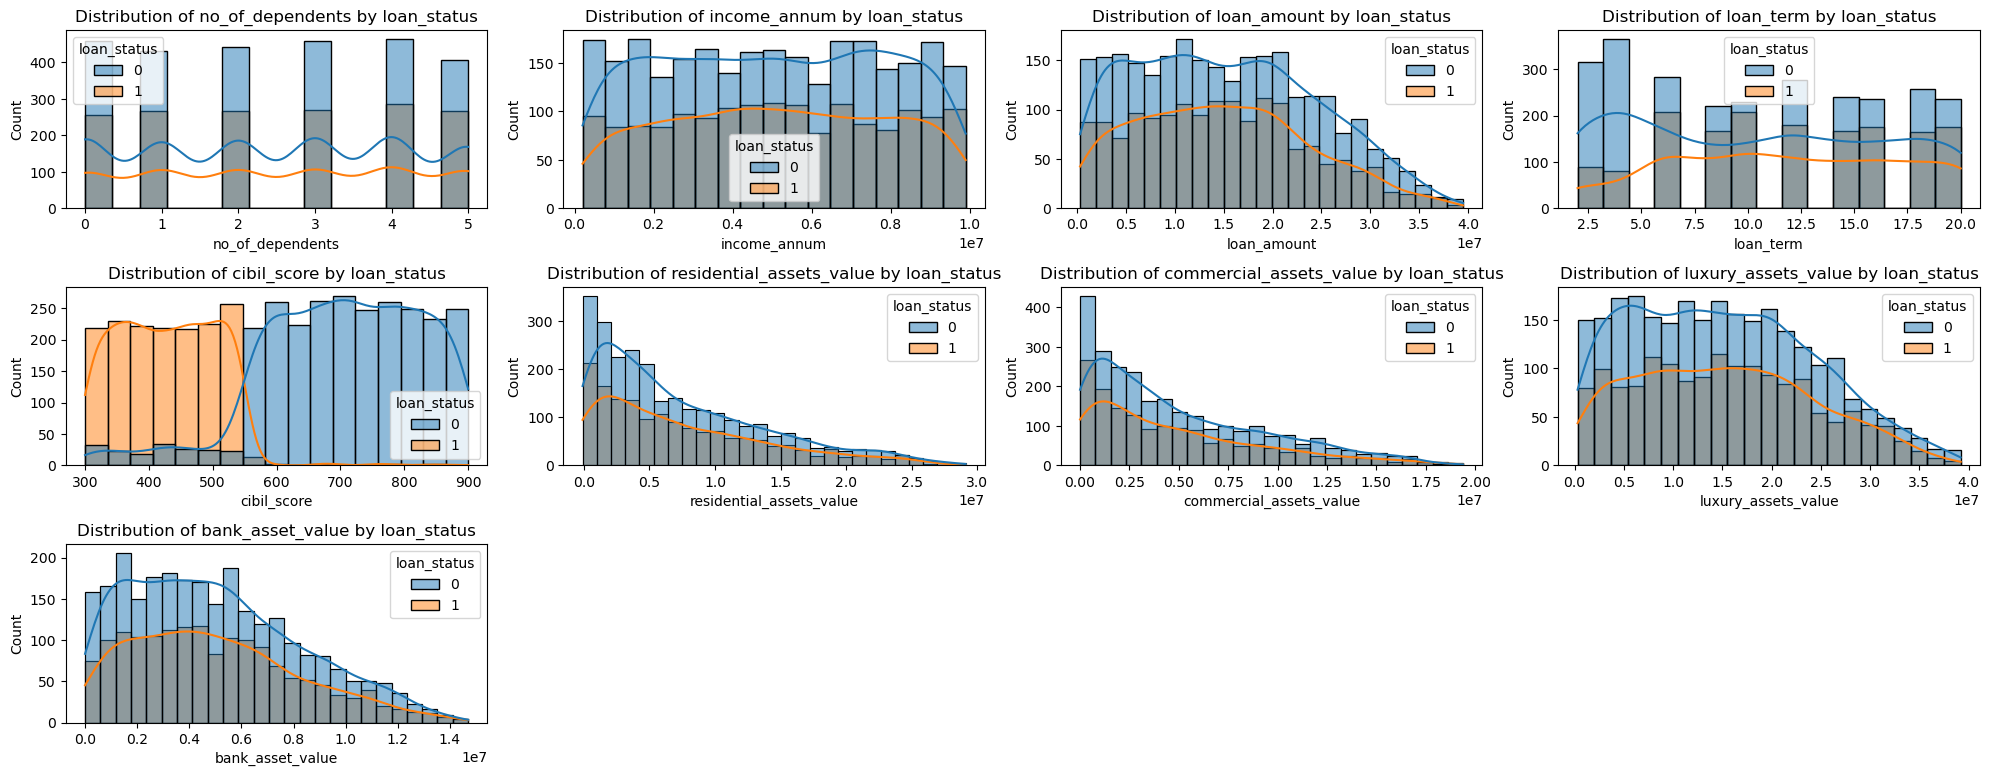

In [317]:
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
target_variable = "loan_status"

plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df_cleaned, x=col, hue=target_variable, kde=True)
    plt.title(f"Distribution of {col} by {target_variable}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.savefig("Histplot.jpg")
plt.show()


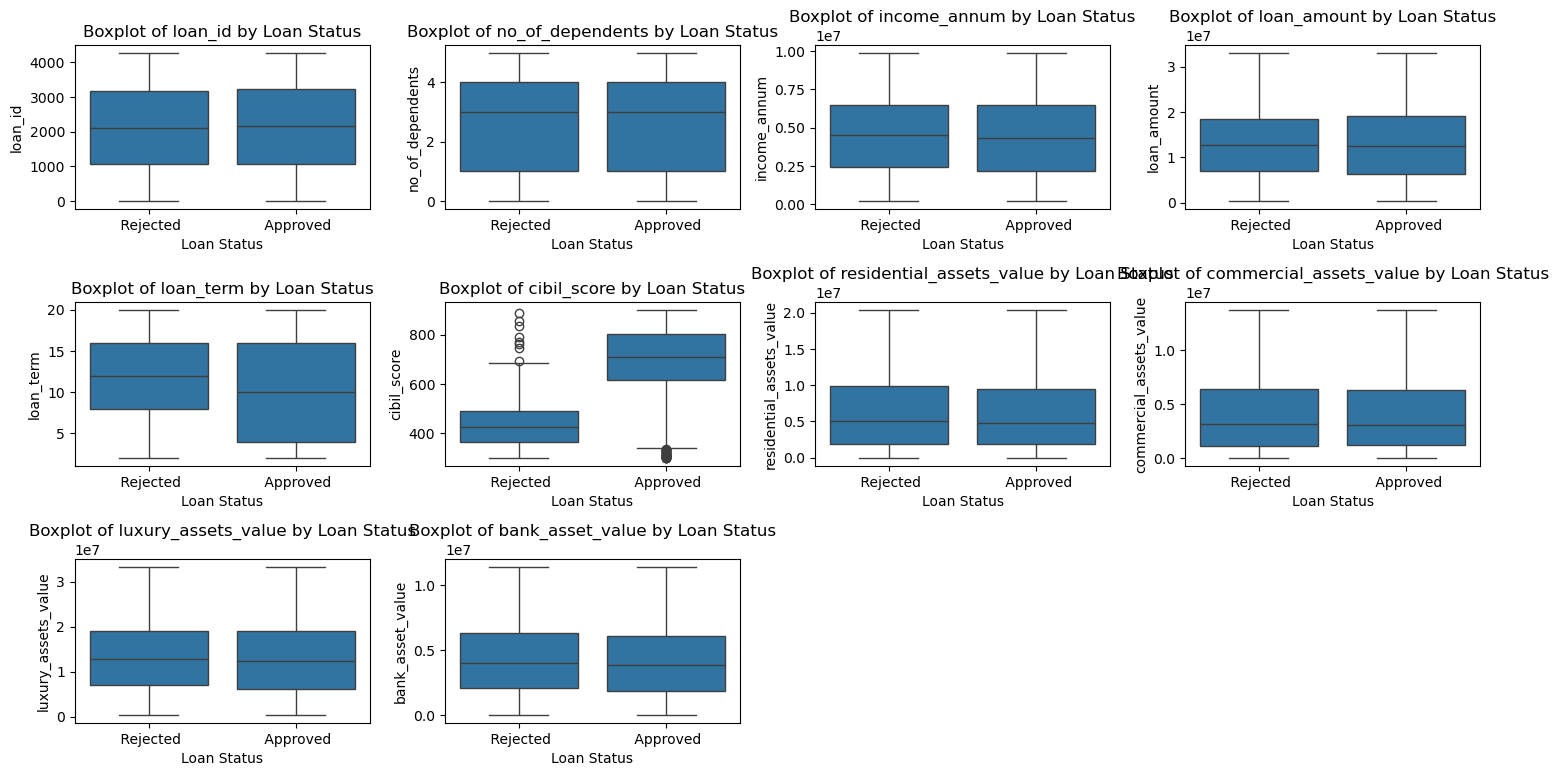

In [209]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='loan_status', y=col, data=df_cleaned)
    plt.title(f"Boxplot of {col} by Loan Status")
    plt.xlabel("Loan Status")
    plt.ylabel(col)

plt.tight_layout()
plt.savefig("Boxplot")
plt.show()


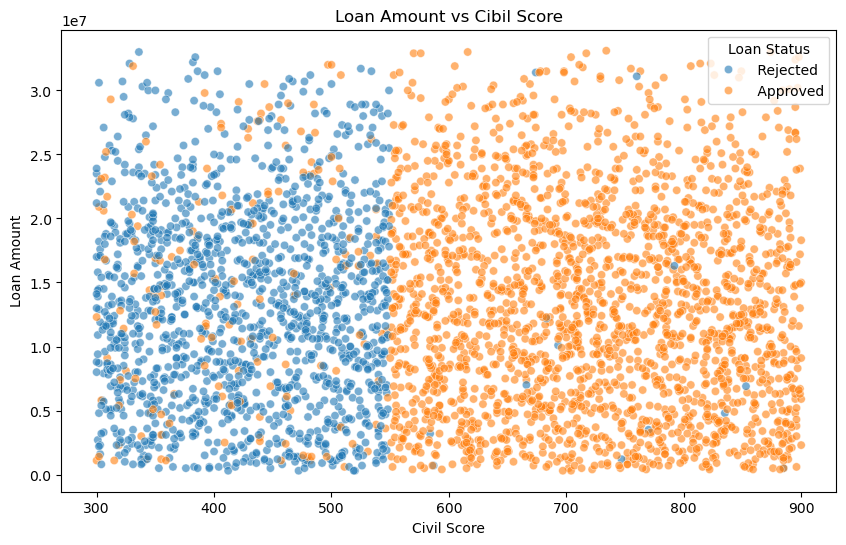

In [210]:
# Scatterplot for cibil_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='cibil_score', y='loan_amount', hue='loan_status', alpha=0.6)
plt.title('Loan Amount vs Cibil Score')
plt.xlabel('Civil Score')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

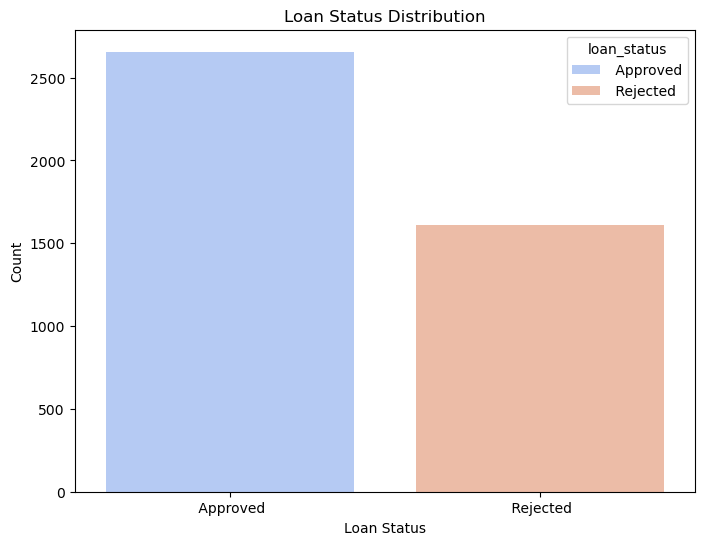

In [211]:
# Count plot for loan status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status', palette='coolwarm',hue='loan_status',legend=True)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

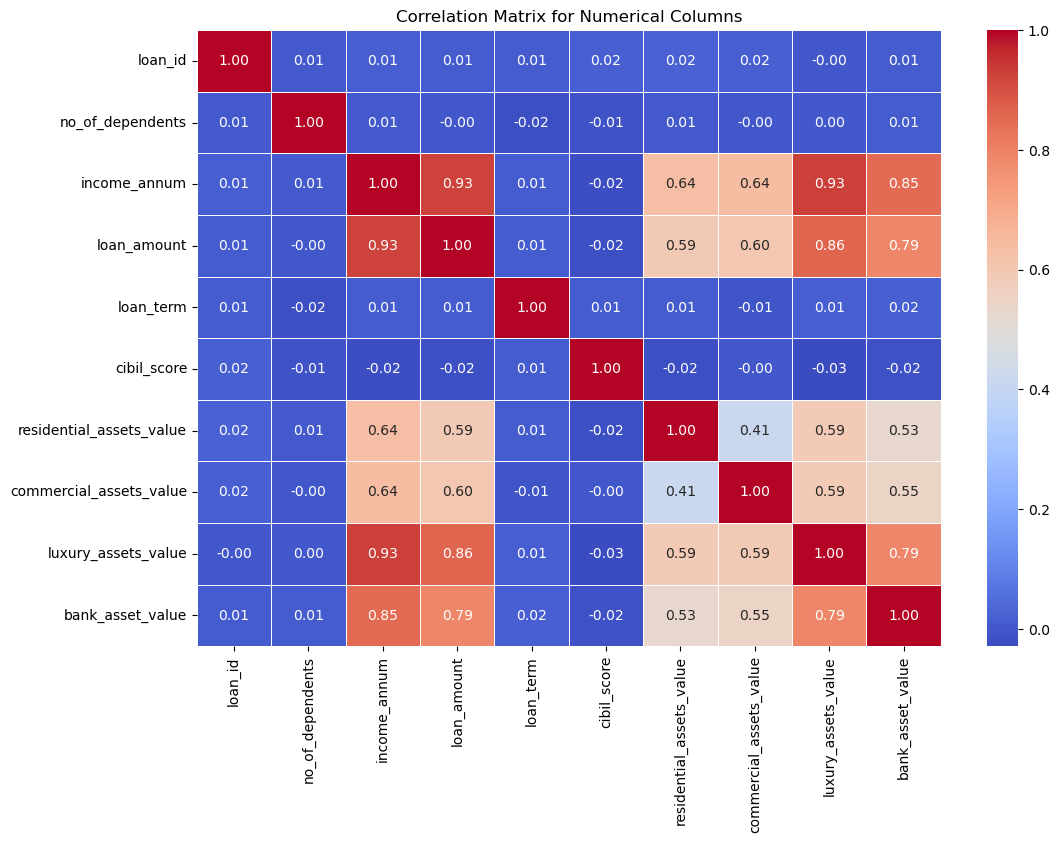

In [212]:
# Correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

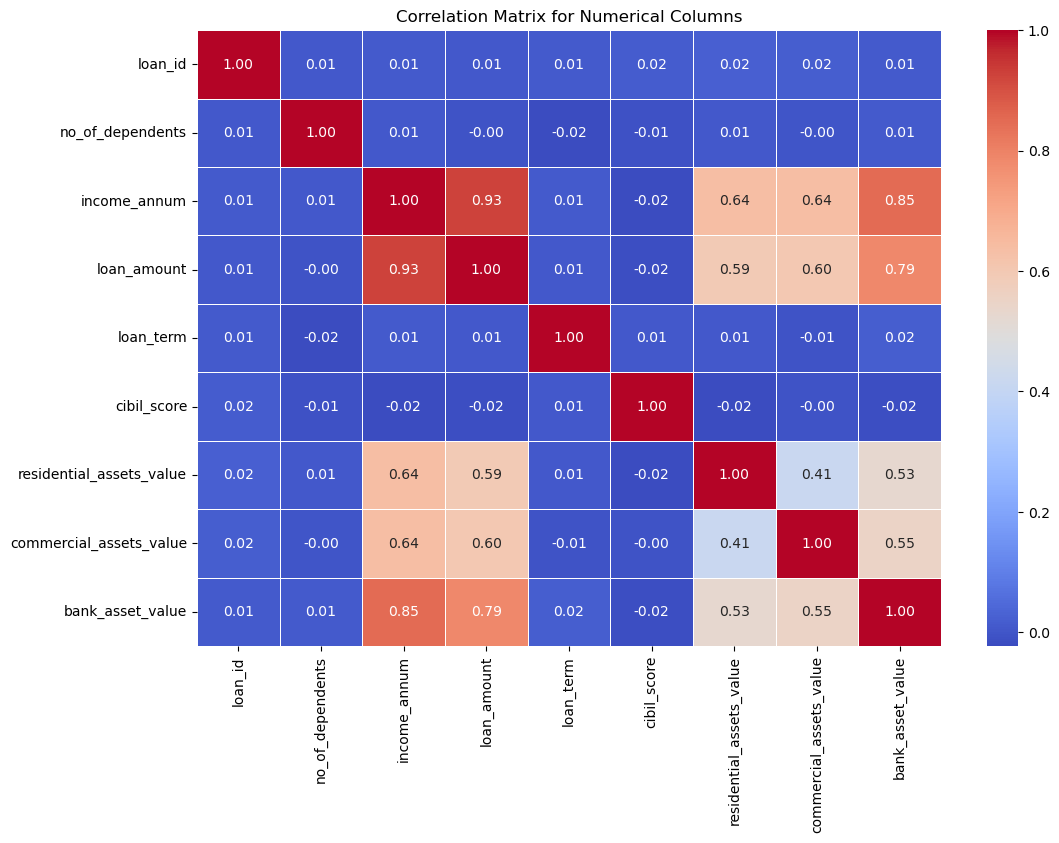

In [213]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('luxury_assets_value', errors='ignore')
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

# FEATURE ENGINEERING

In [215]:
df_cleaned = df.drop(columns=['loan_id'], errors='ignore')

In [216]:
df_cleaned

no_of_dependents      education self_employed  income_annum  \
0                    2       Graduate            No       9600000   
1                    0   Not Graduate           Yes       4100000   
2                    3       Graduate            No       9100000   
3                    3       Graduate            No       8200000   
4                    5   Not Graduate           Yes       9800000   
...                ...            ...           ...           ...   
4264                 5       Graduate           Yes       1000000   
4265                 0   Not Graduate           Yes       3300000   
4266                 2   Not Graduate            No       6500000   
4267                 1   Not Graduate            No       4100000   
4268                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

     loan_status  
0       Approved  
1       Rejected  
2       Rejected  
3       Rejected  
4       Rejected  
...          ...  
4264    Rejected  
4265    Approved  
4266    Rejected  
4267    Approved  
4268    Approved  

[4269 rows x 12 columns]

In [217]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [218]:
df_cleaned.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

In [219]:
df_cleaned.tail()

no_of_dependents      education self_employed  income_annum  \
4264                 5       Graduate           Yes       1000000   
4265                 0   Not Graduate           Yes       3300000   
4266                 2   Not Graduate            No       6500000   
4267                 1   Not Graduate            No       4100000   
4268                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

     loan_status  
4264    Rejected  
4265    Approved  
4266    Rejected  
4267    Approved  
4268    Approved

In [220]:
df_cleaned.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [221]:
df_cleaned.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

# ENCODING

In [223]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.astype('category').cat.codes)

In [224]:
# Split data into features (x) and target (y)
x = df_cleaned.drop(columns=['loan_status'])
y = df_cleaned['loan_status']
#Save features before resampling
feature_names = x.columns.tolist()

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# FEATURE SCALING

In [226]:
# Scale the dataset
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [227]:
print("Training Data Head:")
display(pd.DataFrame(x_train_scaled, columns=x.columns).head())
print("\nTesting Data Head:")
display(pd.DataFrame(x_test_scaled, columns=x.columns).head())

Training Data Head:


no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -1.456965  -0.995034       0.998537      1.700955     0.983585   
1          0.305326   1.004990       0.998537     -0.514765    -0.717129   
2         -0.282104   1.004990      -1.001465     -1.086564    -1.228455   
3         -0.282104   1.004990       0.998537     -0.407553    -0.417003   
4          0.305326   1.004990      -1.001465     -0.979352    -0.728245   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.549181    -0.806352                 -0.995573                 1.942808   
1  -0.500709     1.110842                 -0.312884                 0.216625   
2   0.549181    -0.557291                 -0.390463                -0.796070   
3   0.199218    -0.476201                 -0.669744                -1.141306   
4   0.199218    -0.238724                 -0.592166                -0.819085   

   luxury_assets_value  bank_asset_value  
0             0.659076          0.696034  
1            -0.582560          0.078226  
2            -1.066029         -1.126500  
3            -0.516632         -0.107117  
4            -0.978125         -1.126500


Testing Data Head:


no_of_dependents  education  self_employed  income_annum  loan_amount  \
0          0.305326  -0.995034      -1.001465      1.057681     1.239248   
1         -0.869535  -0.995034       0.998537     -1.122302    -1.206223   
2         -0.282104   1.004990       0.998537     -0.621978    -0.605971   
3          0.305326   1.004990       0.998537     -0.907877    -0.694897   
4         -0.869535   1.004990      -1.001465      1.021944     1.583837   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.899145     1.690054                  1.300742                -0.151628   
1  -1.200636     0.126180                 -0.421494                -0.496865   
2   1.249108     1.724807                  0.385319                -0.934164   
3   0.199218    -0.348774                 -0.390463                -0.727022   
4  -1.550599     1.000791                  1.580024                 1.804714   

   luxury_assets_value  bank_asset_value  
0             1.087606         -0.292459  
1            -0.835282         -1.250062  
2            -0.329837         -0.014446  
3            -0.659475         -0.508692  
4             0.582161         -0.292459

In [228]:
# Perform ANOVA F-value test and select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
x_train_selected = selector.fit_transform(x_train_scaled, y_train)
x_test_selected = selector.transform(x_test_scaled)
selected_features = x.columns[selector.get_support()]

In [229]:
# Create a DataFrame for feature importance
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("Feature Importance:")
print(feature_scores)

Feature Importance:
                     Feature        Score
6                cibil_score  4832.409861
5                  loan_term    43.433865
4                loan_amount     2.054916
8    commercial_assets_value     0.599747
7   residential_assets_value     0.597005
0           no_of_dependents     0.511385
9        luxury_assets_value     0.216324
3               income_annum     0.177092
2              self_employed     0.077484
1                  education     0.038745
10          bank_asset_value     0.003961


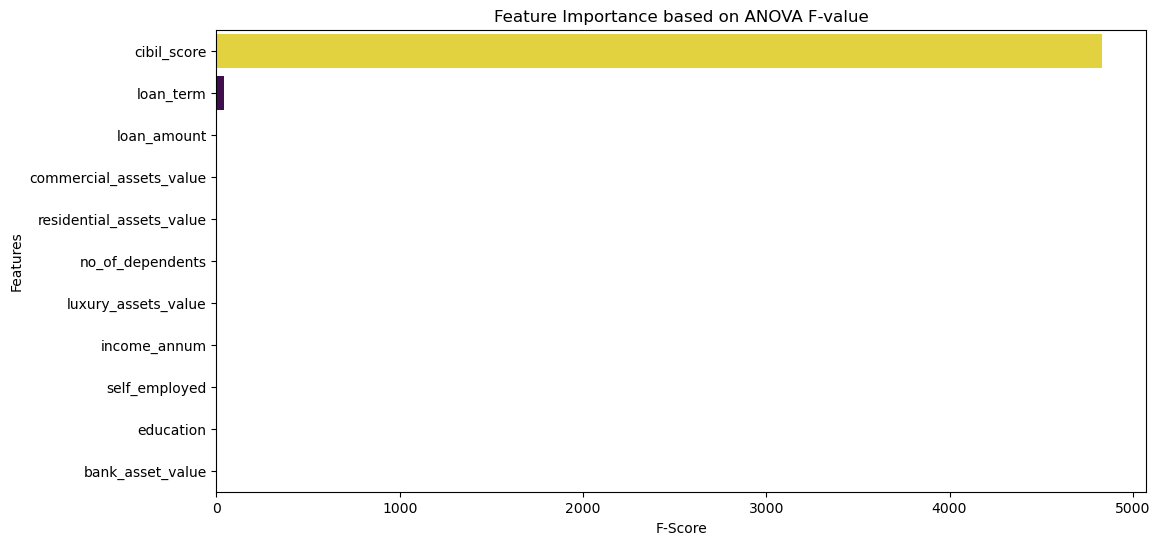

In [230]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_scores['Score'], y=feature_scores['Feature'], palette='viridis',hue=feature_scores['Score'], legend=False)
plt.title("Feature Importance based on ANOVA F-value")
plt.xlabel("F-Score")
plt.ylabel("Features")
plt.show()

# MODEL IMPLEMENTATION

In [232]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, solver='saga', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [233]:
# Train models, display classification reports, and print confusion matrices
train_accuracies = {}
test_accuracies = {}
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)
    train_accuracies[name] = accuracy_score(y_train, y_pred_train)
    test_accuracies[name] = accuracy_score(y_test, y_pred_test)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred_test))
    
    # Print Confusion Matrix
    print(f"\n{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.99      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Random Forest Confusion Matrix:
[[527   4]
 [ 12 311]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854


Logistic Regression Confusion Matrix:
[[505  26]
 [ 40 283]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531

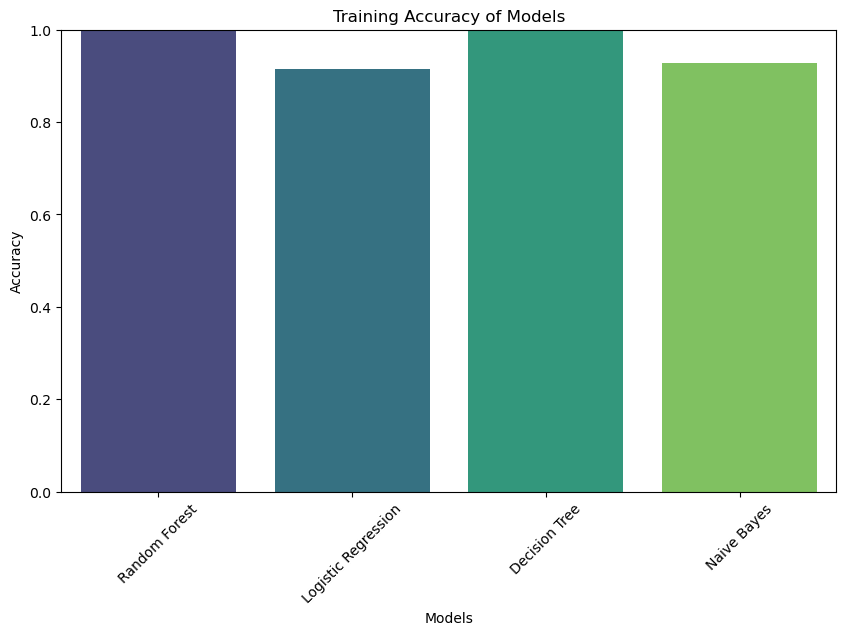

In [234]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(train_accuracies.keys()), y=list(train_accuracies.values()), palette='viridis', hue=list(train_accuracies.keys()),legend =False)
plt.title("Training Accuracy of Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.savefig("Training Accuracy of Models.jpg")
plt.show()

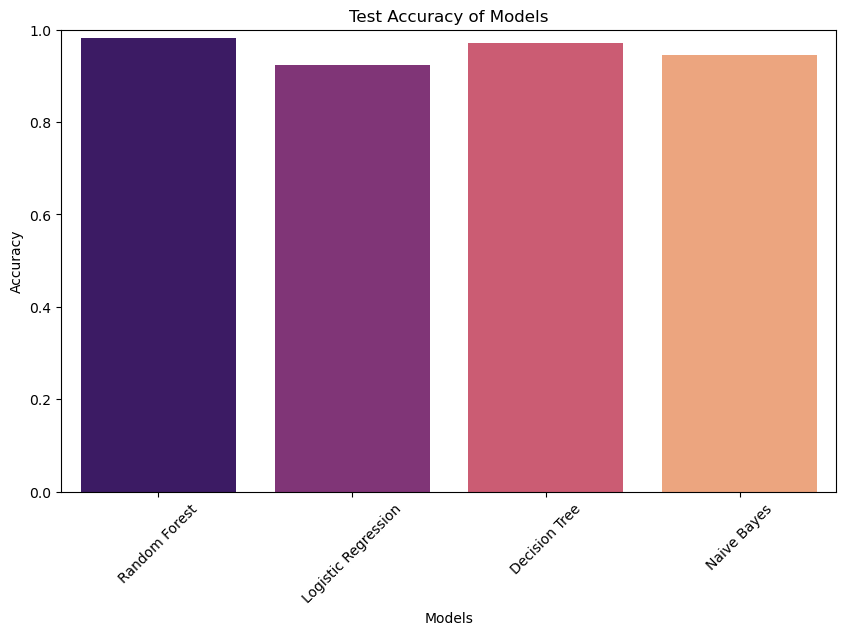

In [235]:
# Visualize test accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), palette='magma',hue=list(train_accuracies.keys()),legend =False)
plt.title("Test Accuracy of Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.savefig("Testing Accuracy of Models.jpg")
plt.show()

In [236]:
# Display summary of performance
performance_summary = pd.DataFrame({
    "Model": list(models.keys()),
    "Training Accuracy": list(train_accuracies.values()),
    "Test Accuracy": list(test_accuracies.values())
})
print("\nPerformance Summary:")
print(performance_summary)


Performance Summary:
                 Model  Training Accuracy  Test Accuracy
0        Random Forest           1.000000       0.981265
1  Logistic Regression           0.914495       0.922717
2        Decision Tree           1.000000       0.971897
3          Naive Bayes           0.927379       0.946136


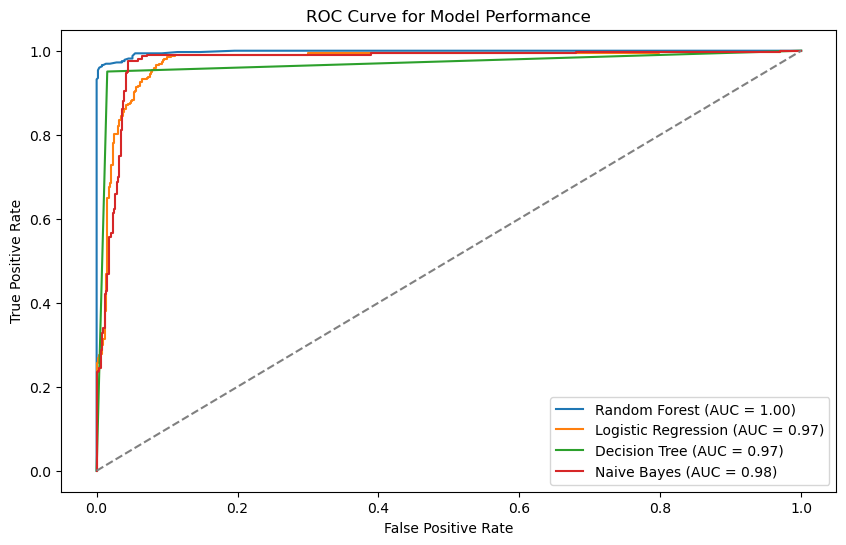

In [237]:
# Draw ROC Curve for all models
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_prob = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Model Performance")
plt.legend()
plt.savefig("Roc Models.jpg")
plt.show()

# MODEL OPTIMISATION

In [239]:
# Resample the target variable to balance the dataset
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train_scaled, y_train)

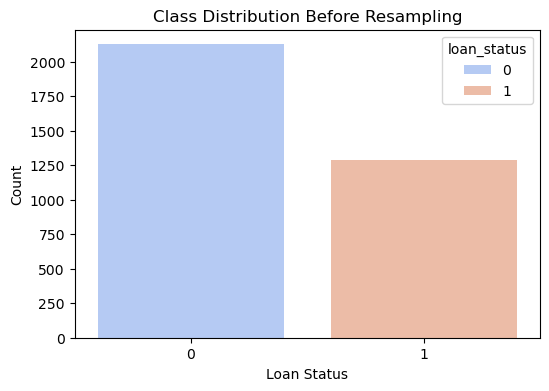

In [240]:
# Plot distribution before resampling
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='coolwarm',hue=y_train, legend=True)
plt.title("Class Distribution Before Resampling")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.savefig("Training Accuracy of Models before.jpg")
plt.show()

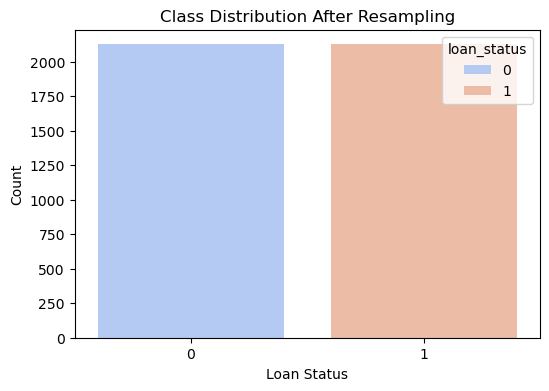

In [241]:
# Plot distribution after resampling
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette='coolwarm',hue=y_resampled, legend=True)
plt.title("Class Distribution After Resampling")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.savefig("Training Accuracy of Models after.jpg")
plt.show()

In [242]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, solver='saga', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [243]:
# Perform K-fold cross-validation for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, x_resampled, y_resampled, cv=kf, scoring='accuracy')
    cv_results[name] = scores
    print(f"\n{name} 5-Fold Cross-Validation Accuracies: {scores}")
    print(f"{name} Mean Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    model.fit(x_resampled, y_resampled)
    y_pred_kfold = model.predict(x_test_scaled)
    print(f"\nClassification Report for {name} (K-Fold CV):\n{classification_report(y_test, y_pred_kfold)}")


Random Forest 5-Fold Cross-Validation Accuracies: [0.98       0.99058824 0.98470588 0.99176471 0.98588235]
Random Forest Mean Accuracy: 0.9866 (+/- 0.0042)

Classification Report for Random Forest (K-Fold CV):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.98      0.97      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Logistic Regression 5-Fold Cross-Validation Accuracies: [0.91529412 0.90823529 0.93882353 0.92117647 0.92235294]
Logistic Regression Mean Accuracy: 0.9212 (+/- 0.0101)

Classification Report for Logistic Regression (K-Fold CV):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.90      0.93      0.91       323

    accuracy                           0.93       854
   macro avg   

In [244]:
# Define hyperparameter search space
hyperparameter_grid = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["lbfgs", "saga"]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Naive Bayes": {}
}

# Implement GridSearchCV
warnings.filterwarnings('ignore')

# Use accuracy_score as the scoring function
accuracy = make_scorer(accuracy_score)

grid_search_results = {}
kfold_cv_mean_scores = {}


for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    # Get the hyperparameter grid for the current model
    param_grid = hyperparameter_grid.get(name, {})

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy', verbose=0, n_jobs=-1)  # Use n_jobs=-1 for parallel processing

    # Fit GridSearchCV to the data
    grid_search.fit(x_resampled, y_resampled)

    # Store the best model and results
    cv_results[name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'best_estimator': grid_search.best_estimator_
    }

    print(f"{name} Best Accuracy: {grid_search.best_score_:.4f}")
    print(f"{name} Best Parameters: {grid_search.best_params_}")

for name, result in cv_results.items():
    best_estimator = result['best_estimator']
    y_pred = best_estimator.predict(x_test_scaled)
    print(f"\nClassification Report for {name}:\n{classification_report(y_test, y_pred)}")

Tuning hyperparameters for Random Forest...
Random Forest Best Accuracy: 0.9871
Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Tuning hyperparameters for Logistic Regression...
Logistic Regression Best Accuracy: 0.9231
Logistic Regression Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Tuning hyperparameters for Decision Tree...
Decision Tree Best Accuracy: 0.9831
Decision Tree Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Tuning hyperparameters for Naive Bayes...
Naive Bayes Best Accuracy: 0.9473
Naive Bayes Best Parameters: {}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Classification Report for Logist

In [245]:
# Dictionaries to store results
kfold_results = {}
gridsearch_results = {}

# Loop through models and evaluate
for name, model in models.items():
    # K-Fold Cross-Validation Evaluation
    model.fit(x_resampled, y_resampled)
    y_pred_kfold = model.predict(x_test_scaled)
    report_kfold = classification_report(y_test, y_pred_kfold, output_dict=True)
    kfold_results[name] = {
        "Precision": report_kfold["weighted avg"]["precision"],
        "Recall": report_kfold["weighted avg"]["recall"],
        "F1-Score": report_kfold["weighted avg"]["f1-score"]
    }
    
    # GridSearchCV Evaluation 
    best_model = grid_search.best_estimator_  
    y_pred_grid = best_model.predict(x_test_scaled)
    report_grid = classification_report(y_test, y_pred_grid, output_dict=True)
    gridsearch_results[name] = {
        "Precision": report_grid["weighted avg"]["precision"],
        "Recall": report_grid["weighted avg"]["recall"],
        "F1-Score": report_grid["weighted avg"]["f1-score"]
    }

# Convert results to DataFrame for better visualization
kfold_df = pd.DataFrame(kfold_results).T
gridsearch_df = pd.DataFrame(gridsearch_results).T
comparison_df = kfold_df.join(gridsearch_df, lsuffix="_KFold", rsuffix="_GridSearch")

print("\nComparison of Classification Reports (K-Fold vs. GridSearchCV)")
display(comparison_df)



Comparison of Classification Reports (K-Fold vs. GridSearchCV)


Precision_KFold  Recall_KFold  F1-Score_KFold  \
Random Forest               0.982453      0.982436        0.982408   
Logistic Regression         0.933818      0.933255        0.933429   
Decision Tree               0.976596      0.976581        0.976537   
Naive Bayes                 0.955946      0.953162        0.953500   

                     Precision_GridSearch  Recall_GridSearch  \
Random Forest                    0.955946           0.953162   
Logistic Regression              0.955946           0.953162   
Decision Tree                    0.955946           0.953162   
Naive Bayes                      0.955946           0.953162   

                     F1-Score_GridSearch  
Random Forest                     0.9535  
Logistic Regression               0.9535  
Decision Tree                     0.9535  
Naive Bayes                       0.9535

In [246]:
# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store final model results
final_model_results = {}
best_models={}

# Train and evaluate each model using K-Fold
for name, model in models.items():
    scores = cross_val_score(model, x_resampled, y_resampled, cv=kf, scoring='accuracy')
    
    # Train final model on full dataset
    model.fit(x_resampled, y_resampled)
    train_accuracy = model.score(x_resampled, y_resampled)
    test_accuracy = model.score(x_test_scaled, y_test)
    y_pred_final = model.predict(x_test_scaled)
    report_final = classification_report(y_test, y_pred_final, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred_final)

    best_models[name] = model
    # Store results
    final_model_results[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Mean CV Accuracy": scores.mean(),
        "Std Dev CV Accuracy": scores.std(),
        "Precision": report_final["weighted avg"]["precision"],
        "Recall": report_final["weighted avg"]["recall"],
        "F1-Score": report_final["weighted avg"]["f1-score"],
        "Confusion Matrix": conf_matrix
        
    }

# Convert final results to DataFrame 
final_results_df = pd.DataFrame(final_model_results).T.drop(columns=["Confusion Matrix"])




# Print final results
print("\nFinal Model Evaluation using K-Fold Cross-Validation")
print(final_results_df)

# Print confusion matrices separately
for name, results in final_model_results.items():
    print(f"\nConfusion Matrix for {name}:")
    print(results["Confusion Matrix"])




Final Model Evaluation using K-Fold Cross-Validation
                    Train Accuracy Test Accuracy Mean CV Accuracy  \
Random Forest                  1.0      0.982436         0.986588   
Logistic Regression       0.922118      0.933255         0.921176   
Decision Tree                  1.0      0.976581         0.983059   
Naive Bayes               0.947765      0.953162         0.947294   

                    Std Dev CV Accuracy Precision    Recall  F1-Score  
Random Forest                  0.004248  0.982453  0.982436  0.982408  
Logistic Regression            0.010148  0.933818  0.933255  0.933429  
Decision Tree                  0.007043  0.976596  0.976581  0.976537  
Naive Bayes                    0.009335  0.955946  0.953162    0.9535  

Confusion Matrix for Random Forest:
[[526   5]
 [ 10 313]]

Confusion Matrix for Logistic Regression:
[[498  33]
 [ 24 299]]

Confusion Matrix for Decision Tree:
[[524   7]
 [ 13 310]]

Confusion Matrix for Naive Bayes:
[[497  34]
 [  6 31

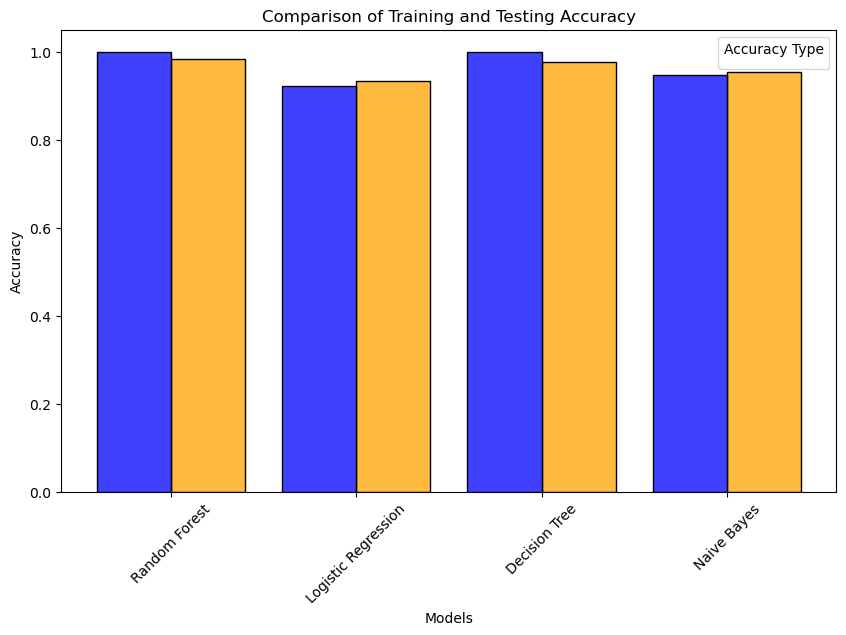

In [247]:
# Plot Training vs. Testing Accuracy 
plt.figure(figsize=(10, 6))
train_data = pd.DataFrame({"Model": final_results_df.index, "Accuracy": final_results_df["Train Accuracy"], "Type": "Train Accuracy"})
test_data = pd.DataFrame({"Model": final_results_df.index, "Accuracy": final_results_df["Test Accuracy"], "Type": "Test Accuracy"})
plot_data = pd.concat([train_data, test_data])

sns.histplot(data=plot_data, x="Model", hue="Type", weights="Accuracy", multiple="dodge", shrink=0.8, kde=False, palette={"Train Accuracy": "blue", "Test Accuracy": "orange"})

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Training and Testing Accuracy")
plt.xticks(rotation=45)
plt.legend(title="Accuracy Type")
plt.show()
plt.show()

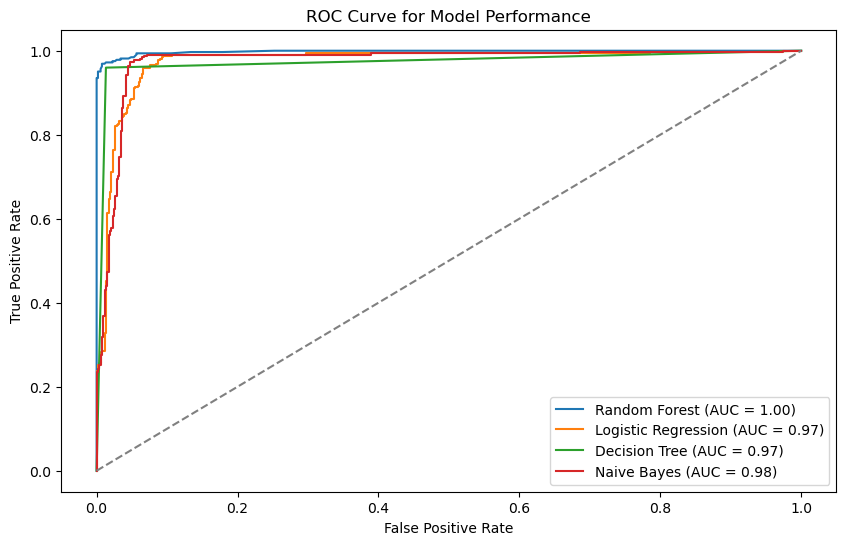

In [248]:
plt.figure(figsize=(10, 6))
for name, model in best_models.items():
    y_prob = model.predict_proba(x_test_scaled)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Model Performance")
plt.legend()
plt.show()


# FEATURE IMPORTANCE

In [250]:
if "Random Forest" in best_models:
    rf_model = best_models["Random Forest"]
    feature_importances = rf_model.feature_importances_

In [251]:
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Print feature importance table
print("\nFeature Importance for Random Forest:")
display(feature_importance_df) 


Feature Importance for Random Forest:


Feature  Importance
6                cibil_score    0.827125
5                  loan_term    0.051811
4                loan_amount    0.030109
9        luxury_assets_value    0.017235
3               income_annum    0.016846
8    commercial_assets_value    0.016009
7   residential_assets_value    0.015034
10          bank_asset_value    0.014034
0           no_of_dependents    0.006893
2              self_employed    0.002848
1                  education    0.002054

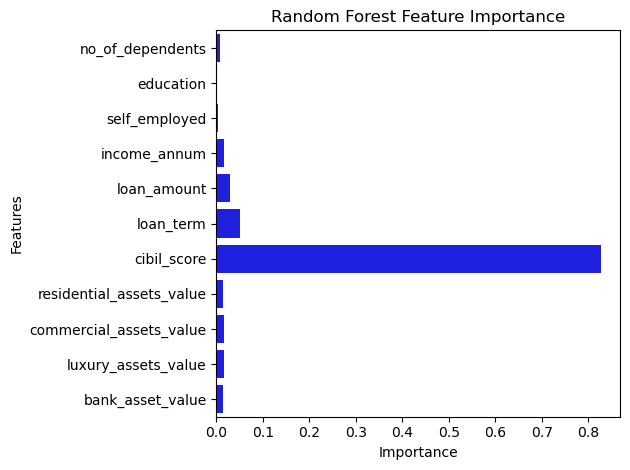

In [325]:
sns.barplot(x=feature_importances, y=feature_names, color='blue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("Feature Importance.jpg")
plt.show()